#### 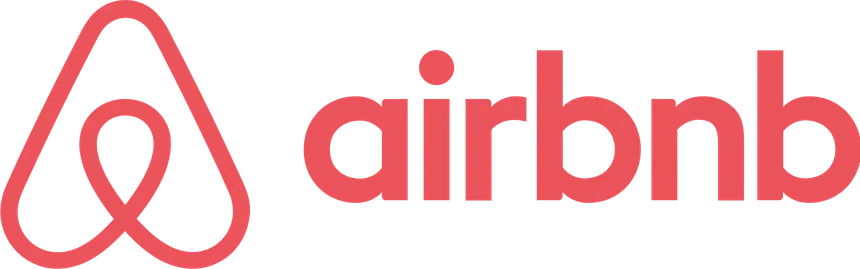

# Airbnb & Real Estate Market Analysis: Big Bear & JoshuaTree 

###### 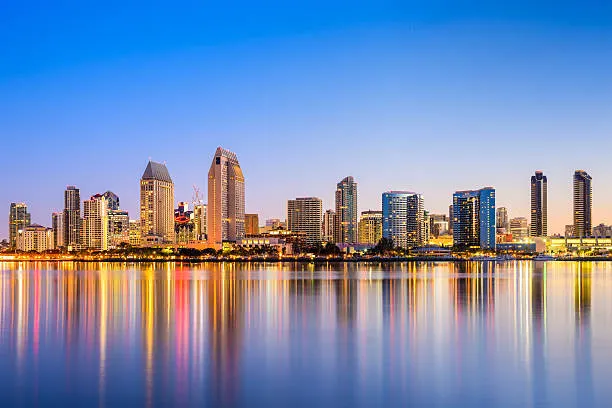

## Introduction

Airbnb is a global online marketplace that connects people who want to rent out their property with travellers looking for shortterm stays. That said, Airbnb operates on a peer-to-peer(P2P) model meaning it facilitates transactions between property owners say hosts and guests, and looking into areas like: pricing and optimization, market trendsand guest preferences should give an overview of the steps to take in the event we need to scale.
The datasets to be used in this analysis are: Market Analysis, Amenities, Geolocation and Sales Properties.
This dataset is a valuable resource for researchers and analysts interested in gaining insights into the real estate and Airbnb rental markets in California, particularly within the specified regions.
The regions we will be looking at are: Big Bear and Joshua Tree.

### Project Objectives

1. Ensure data is clean and ready for analysis.
2. Identify prime locations for Airbnb rentals and sales.
3. Analysis of rental and real estate market trends in the regions (Big Bear and Joshua Tree). 
4. Understand the relationship between Airbnb rentals and real estate sales.

## Chapter One: Data Collection and Cleaning

For this section I made use of Pandas libraries to perform data cleaning.

In [61]:
import pandas as pd
import numpy as np

Opening the csv files about the project

Key:JT=Joshua Tree
    BB=Big Bear

In [62]:
amenities=pd.read_csv("amenities.csv",delimiter=';', decimal=',')

market_analysis = pd.read_csv("market_analysis_2019.csv",delimiter=';', decimal=',')
geolocation=pd.read_csv("geolocation.csv",delimiter=';', decimal=',')

total_sales_propertiesJT52 = pd.read_csv("sales_properties_total_zipcode_92252.csv",delimiter=';', decimal=',')
total_sales_propertiesJT84 = pd.read_csv("sales_properties_total_zipcode_92284.csv",delimiter=';', decimal=',')

total_sales_propertiesBB14=pd.read_csv("sales_properties_total_zipcode_92314.csv",delimiter=';', decimal=',')
total_sales_propertiesBB15 = pd.read_csv("sales_properties_total_zipcode_92315.csv",delimiter=';', decimal=',')

withpool_sales_propertiesJT52=pd.read_csv("sales_properties_with_pool_zipcode_92252.csv",delimiter=';', decimal=',')
withpool_sales_propertiesJT84=pd.read_csv("sales_properties_with_pool_zipcode_92284.csv",delimiter=';', decimal=',')

#The files had inconsistences with delimiters and decimals resulting in a pasing error. Use of (delimiter=';', decimal=',') was necessary to helo differentiate the two. 


In [63]:
amenities


,unified_id,month,hot_tub,pool
0,AIR10052559,2022-12,1,0
1,AIR10178668,2022-12,0,0
2,AIR10211700,2022-12,0,0
3,AIR10344705,2022-12,0,0
4,AIR10424683,2022-12,0,1
...,...,...,...,...
49306,AIR9959855,2020-01,1,0
49307,AIR9960008,2020-01,0,0
49308,AIR9976790,2020-01,1,0
49309,AIR9986505,2020-01,1,0


In [64]:
market_analysis


,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly_rate,lead_time,length_stay
0,AIR10000347,2019-1,92315,Big Bear Lake,2-5 Units,3,2,10,13948.759740,31,1.000000,449.959992,8.0,65.0
1,AIR10000347,2019-10,92315,Big Bear Lake,2-5 Units,3,2,10,449.959992,31,0.032258,449.959992,8.0,1.0
2,AIR10000347,2019-11,92315,Big Bear Lake,2-5 Units,3,2,10,0.000000,30,0.000000,NaN,NaN,NaN
3,AIR10000347,2019-12,92315,Big Bear Lake,2-5 Units,3,2,10,4949.679932,31,0.354839,449.970903,41.0,2.4
4,AIR10000347,2019-2,92315,Big Bear Lake,2-5 Units,3,2,10,0.000000,28,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29923,AIR9996370,2019-5,92314,Big Bear City,Single Owners,3,1,8,142.979996,31,0.032258,142.979996,2.0,1.0
29924,AIR9996370,2019-6,92314,Big Bear City,Single Owners,3,1,8,399.959992,30,0.066667,199.979996,2.0,1.0
29925,AIR9996370,2019-7,92314,Big Bear City,Single Owners,3,1,8,658.939987,31,0.096774,219.646662,19.0,3.0
29926,AIR9996370,2019-8,92314,Big Bear City,Single Owners,3,1,8,339.959992,31,0.064516,169.979996,8.5,1.5


In [65]:
geolocation

,unified_id,month,street_name,latitude,longitude
0,AIR10052559,2022-12,Heavenly Valley Road,34.239480,-116.879910
1,AIR10178668,2022-12,Round Drive,34.250950,-116.941390
2,AIR10211700,2022-12,NaN,34.245160,-116.876180
3,AIR10344705,2022-12,NaN,34.267500,-116.860890
4,AIR10424683,2022-12,Starvation Flats Road,34.253410,-116.880250
...,...,...,...,...,...
49306,AIR9959855,2020-01,Peregrine Avenue,34.237609,-116.870089
49307,AIR9960008,2020-01,Waterview Drive,34.246217,-116.946168
49308,AIR9976790,2020-01,Starvation Flats Road,34.250974,-116.880491
49309,AIR9986505,2020-01,Rocking Chair Road,34.100871,-116.287679


In [66]:
total_sales_propertiesJT52

,Url,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Lot Size,Home Type,...,State,Country,Broker Name,Has 3D Model,Has Image,Has Video,isZillowOwned,sgapt,statusText,statusType
0,https://www.zillow.com/homedetails/8198-Uphill...,NaN,18000000,2435.0,Not specified,4,3,5470,NaN,SINGLE_FAMILY,...,CA,USA,AKGRE Inc,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
1,https://www.zillow.com/homedetails/4757-Avenid...,223200.0,399990,1786.0,Not specified,2,3,1056,NaN,SINGLE_FAMILY,...,CA,USA,Champion Realty,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
2,https://www.zillow.com/homedetails/61018-Presc...,568947.0,575000,2300.0,Not specified,2,3,1577,NaN,SINGLE_FAMILY,...,CA,USA,BHG Desert Lifestyle Properties,VERDADERO,VERDADERO,VERDADERO,FALSO,For Sale (Broker),House for sale,FOR_SALE
3,https://www.zillow.com/homedetails/61875-Anaco...,851656.0,899000,4798.0,Not specified,2,3,1434,NaN,SINGLE_FAMILY,...,CA,USA,Cherie Miller & Assoc.,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
4,https://www.zillow.com/homedetails/61879-Petun...,NaN,369900,1825.0,Not specified,1,3,1040,NaN,SINGLE_FAMILY,...,CA,USA,Cherie Miller & Assoc.,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,https://www.zillow.com/homedetails/64873-Choll...,331900.0,399995,1853.0,Not specified,1,3,1080,NaN,SINGLE_FAMILY,...,CA,USA,REALTY ONE GROUP HOMELINK,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
69,https://www.zillow.com/homedetails/62036-Bonai...,400438.0,413000,2400.0,Not specified,2,3,1386,NaN,SINGLE_FAMILY,...,CA,USA,Sotheby's International Realty,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
70,https://www.zillow.com/homedetails/7320-Sherwo...,850155.0,879000,2398.0,Not specified,2,3,1700,NaN,SINGLE_FAMILY,...,CA,USA,Joshua Tree Modern,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
71,https://www.zillow.com/homedetails/0-Sunfair-R...,NaN,1800000,3499.0,Not specified,4,4,2200,NaN,SINGLE_FAMILY,...,CA,USA,Berkshire Hathaway HomeService,FALSO,VERDADERO,FALSO,FALSO,New Construction,New construction,FOR_SALE


In [56]:
total_sales_propertiesJT84

,Url,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Lot Size,Home Type,...,State,Country,Broker Name,Has 3D Model,Has Image,Has Video,isZillowOwned,sgapt,statusText,statusType
0,https://www.zillow.com/homedetails/58176-Deser...,526300.0,539000,3649.0,Not specified,3,3,2436,NaN,SINGLE_FAMILY,...,CA,USA,Cherie Miller & Assoc.,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
1,https://www.zillow.com/homedetails/9025-Warren...,890416.0,949000,3058.0,Not specified,4,4,3542,NaN,SINGLE_FAMILY,...,CA,USA,Malbec Realty,FALSO,VERDADERO,VERDADERO,FALSO,For Sale (Broker),House for sale,FOR_SALE
2,https://www.zillow.com/homedetails/57557-Sunny...,NaN,459999,NaN,Not specified,2,4,1940,NaN,SINGLE_FAMILY,...,CA,USA,Realty One Group United,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
3,https://www.zillow.com/homedetails/56276-Breez...,487707.0,499900,3234.0,Not specified,2,3,1632,NaN,SINGLE_FAMILY,...,CA,USA,Harcourts Prime Properties,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
4,https://www.zillow.com/homedetails/4343-Avalon...,558100.0,659000,3195.0,Not specified,3,3,2010,NaN,SINGLE_FAMILY,...,CA,USA,Power Real Estate,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,https://www.zillow.com/homedetails/57055-Antel...,283900.0,283900,2395.0,Not specified,2,3,1480,NaN,SINGLE_FAMILY,...,CA,USA,Keller Williams Realty-Studio City,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
113,https://www.zillow.com/homedetails/7812-Condal...,NaN,1900000,NaN,Not specified,4,4,4500,NaN,SINGLE_FAMILY,...,CA,USA,Keller Williams Realty,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
114,https://www.zillow.com/homedetails/3832-Avalon...,296900.0,295600,1728.0,Not specified,2,3,1108,NaN,SINGLE_FAMILY,...,CA,USA,Keller Williams Realty-Studio City,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
115,https://www.zillow.com/homedetails/58713-Sun-V...,439482.0,450000,2999.0,Not specified,2,4,1677,NaN,SINGLE_FAMILY,...,CA,USA,Berkshire Hathaway HomeServices California Pro...,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE


In [67]:
total_sales_propertiesBB14

,Url,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Lot Size,Home Type,...,State,Country,Broker Name,Has 3D Model,Has Image,Has Video,isZillowOwned,sgapt,statusText,statusType
0,https://www.zillow.com/homedetails/316-Maple-R...,614000.0,670000,3750.0,Not specified,3,3,2122,NaN,SINGLE_FAMILY,...,CA,USA,Compass,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
1,https://www.zillow.com/homedetails/1113-Michae...,533300.0,649000,2999.0,Not specified,3,4,1975,NaN,SINGLE_FAMILY,...,CA,USA,Active Realty,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
2,https://www.zillow.com/homedetails/919-Robinho...,470600.0,539000,2300.0,Not specified,2,3,1185,NaN,SINGLE_FAMILY,...,CA,USA,Compass,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
3,https://www.zillow.com/homedetails/824-Raleigh...,632272.0,650000,2990.0,Not specified,2,3,1686,NaN,SINGLE_FAMILY,...,CA,USA,KELLER WILLIAMS BBLA,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
4,https://www.zillow.com/homedetails/1000-Willow...,575001.0,575000,2996.0,Not specified,2,3,1850,NaN,SINGLE_FAMILY,...,CA,USA,Century 21 Peak,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
5,https://www.zillow.com/homedetails/913-Mount-D...,NaN,479900,2808.0,Not specified,2,3,1456,NaN,SINGLE_FAMILY,...,CA,USA,Re/Max Area Experts,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
6,https://www.zillow.com/homedetails/281-Pine-Ln...,525000.0,525000,3499.0,Not specified,3,3,1954,NaN,SINGLE_FAMILY,...,CA,USA,Century 21 Wright,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
7,https://www.zillow.com/homedetails/701-Villa-G...,599000.0,599000,2999.0,Not specified,2,4,1443,NaN,SINGLE_FAMILY,...,CA,USA,Re/Max Big Bear,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
8,https://www.zillow.com/homedetails/352-Lookout...,1070564.0,1125000,4805.0,Not specified,5,4,3752,NaN,SINGLE_FAMILY,...,CA,USA,"eXp Realty of California, Inc.",FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
9,https://www.zillow.com/homedetails/1526-Monte-...,418057.0,419000,2728.0,Not specified,2,3,1428,NaN,SINGLE_FAMILY,...,CA,USA,KELLER WILLIAMS BBLA,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE


In [68]:
total_sales_propertiesBB15

,Url,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Lot Size,Home Type,...,State,Country,Broker Name,Has 3D Model,Has Image,Has Video,isZillowOwned,sgapt,statusText,statusType
0,https://www.zillow.com/homedetails/43032-Sunse...,577500.0,599000,2999.0,Not specified,3,4,1651,NaN,SINGLE_FAMILY,...,CA,USA,Re/Max Big Bear,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
1,https://www.zillow.com/homedetails/745-Eureka-...,472362.0,475000,1952.0,Not specified,2,3,876,NaN,SINGLE_FAMILY,...,CA,USA,Re/Max Big Bear,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
2,https://www.zillow.com/homedetails/42998-Monte...,494232.0,499000,2329.0,Not specified,2,3,1174,NaN,SINGLE_FAMILY,...,CA,USA,PONCE & PONCE REALTY,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
3,https://www.zillow.com/homedetails/986-Cameron...,685294.0,699000,2961.0,Not specified,3,4,1706,NaN,SINGLE_FAMILY,...,CA,USA,Re/Max Big Bear,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
4,https://www.zillow.com/homedetails/42876-Encin...,860281.0,899900,3437.0,Not specified,3,5,2400,NaN,SINGLE_FAMILY,...,CA,USA,Re/Max Big Bear,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,https://www.zillow.com/homedetails/801-Cameron...,857851.0,895000,2999.0,Not specified,2,3,1850,NaN,SINGLE_FAMILY,...,CA,USA,InvestorsAlly Realty,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
102,https://www.zillow.com/homedetails/41829-Switz...,1793804.0,1899900,8127.0,Not specified,7,6,3792,NaN,SINGLE_FAMILY,...,CA,USA,"MICHEL HARB, BROKER",FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
103,https://www.zillow.com/homedetails/370-Starlig...,1725900.0,1749000,4175.0,Not specified,4,4,3285,NaN,SINGLE_FAMILY,...,CA,USA,NaN,FALSO,VERDADERO,FALSO,FALSO,New Construction,New construction,FOR_SALE
104,https://www.zillow.com/homedetails/351-Glenwoo...,1231600.0,1549000,6179.0,Not specified,5,6,3700,NaN,SINGLE_FAMILY,...,CA,USA,NaN,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE


In [69]:
withpool_sales_propertiesJT52

,Url,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Lot Size,Home Type,...,State,Country,Broker Name,Has 3D Model,Has Image,Has Video,isZillowOwned,sgapt,statusText,statusType
0,https://www.zillow.com/homedetails/61854-Crest...,392179.0,399000,1897.0,Not specified,2,3,1100,NaN,SINGLE_FAMILY,...,CA,USA,REAL BROKERAGE TECHNOLOGIES,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
1,https://www.zillow.com/homedetails/4741-Avenid...,753106.0,769000,2901.0,Not specified,3,4,1871,NaN,SINGLE_FAMILY,...,CA,USA,Backbeat Homes,VERDADERO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
2,https://www.zillow.com/homedetails/63973-Gold-...,1505009.0,1560000,1823.0,Not specified,3,3,1538,NaN,SINGLE_FAMILY,...,CA,USA,BHG Desert Lifestyle Properties,FALSO,VERDADERO,FALSO,FALSO,New Construction,New construction,FOR_SALE
3,https://www.zillow.com/homedetails/61880-Valle...,691000.0,691000,2425.0,Not specified,2,3,1909,NaN,SINGLE_FAMILY,...,CA,USA,Berkshire Hathaway HomeServices,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
4,https://www.zillow.com/homedetails/62176-Highl...,578800.0,949000,2570.0,Not specified,3,3,1600,NaN,SINGLE_FAMILY,...,CA,USA,"Sharon Rose Realty, Inc.",FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
5,https://www.zillow.com/homedetails/2651-Foxy-F...,1016200.0,1100000,3211.0,Not specified,2,3,1968,NaN,SINGLE_FAMILY,...,CA,USA,Compass,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
6,https://www.zillow.com/homedetails/61464-Melto...,1380952.0,1450000,1545.0,Not specified,3,3,1785,NaN,SINGLE_FAMILY,...,CA,USA,"GARY CASMANO, BROKER",FALSO,VERDADERO,FALSO,FALSO,New Construction,New construction,FOR_SALE
7,https://www.zillow.com/homedetails/3382-Center...,NaN,2100000,NaN,Not specified,3,3,2160,NaN,SINGLE_FAMILY,...,CA,USA,Power Real Estate,FALSO,VERDADERO,FALSO,FALSO,New Construction,New construction,FOR_SALE
8,https://www.zillow.com/homedetails/62610-Belmo...,903800.0,925000,3111.0,Not specified,2,3,2071,NaN,SINGLE_FAMILY,...,CA,USA,Cherie Miller & Assoc.,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
9,https://www.zillow.com/homedetails/60205-Latha...,591369.0,599000,2300.0,Not specified,2,3,1590,NaN,SINGLE_FAMILY,...,CA,USA,Homequest Real Estate,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE


In [70]:
withpool_sales_propertiesJT84

,Url,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Lot Size,Home Type,...,State,Country,Broker Name,Has 3D Model,Has Image,Has Video,isZillowOwned,sgapt,statusText,statusType
0,https://www.zillow.com/homedetails/9025-Warren...,890416,949000,3058,Not specified,4,4,3542,NaN,SINGLE_FAMILY,...,CA,USA,Malbec Realty,FALSO,VERDADERO,VERDADERO,FALSO,For Sale (Broker),House for sale,FOR_SALE
1,https://www.zillow.com/homedetails/7552-Cardil...,543600,749000,2922,Not specified,3,3,1678,NaN,SINGLE_FAMILY,...,CA,USA,Equity Union,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
2,https://www.zillow.com/homedetails/8552-Taft-C...,467500,530000,2710,Not specified,3,3,2134,NaN,SINGLE_FAMILY,...,CA,USA,BHG Desert Lifestyle Properties,VERDADERO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
3,https://www.zillow.com/homedetails/5088-Elata-...,684150,699000,3034,Not specified,3,3,1929,NaN,SINGLE_FAMILY,...,CA,USA,Cherie Miller & Assoc.,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
4,https://www.zillow.com/homedetails/7478-Goleta...,525004,525000,2199,Not specified,2,3,1508,NaN,SINGLE_FAMILY,...,CA,USA,Compass,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
5,https://www.zillow.com/homedetails/7629-Rockaw...,764822,775000,3539,Not specified,2,3,2235,NaN,SINGLE_FAMILY,...,CA,USA,Cherie Miller & Assoc.,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
6,https://www.zillow.com/homedetails/7354-Rubido...,880671,900000,2400,Not specified,2,3,1764,NaN,SINGLE_FAMILY,...,CA,USA,Compass,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
7,https://www.zillow.com/homedetails/7399-Paloma...,478372,489900,2350,Not specified,2,3,1530,NaN,SINGLE_FAMILY,...,CA,USA,BHG Desert Lifestyle Properties,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
8,https://www.zillow.com/homedetails/8210-Church...,418600,479000,2907,Not specified,2,4,1820,NaN,SINGLE_FAMILY,...,CA,USA,"Revilo Realty, Inc.",FALSO,VERDADERO,FALSO,FALSO,Foreclosure,Foreclosure,FOR_SALE
9,https://www.zillow.com/homedetails/55960-Onaga...,277830,285000,1829,Not specified,1,3,750,NaN,SINGLE_FAMILY,...,CA,USA,Good Deal Realty inc.,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
